In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [91]:
np.random.seed(12345)

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

<IPython.core.display.Javascript object>


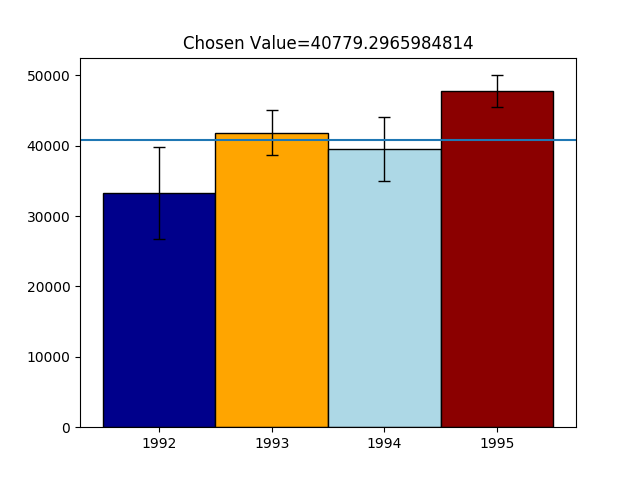

7

In [92]:
##None Interactive Figure
%matplotlib notebook
fig=plt.figure()
ci=[1.96*df.loc[1992].std()/np.sqrt(len(df.loc[1992])),1.96*df.loc[1993].std()/np.sqrt(len(df.loc[1992])), 1.96*df.loc[1994].std()/np.sqrt(len(df.loc[1992])),1.96*df.loc[1995].std()/np.sqrt(len(df.loc[1992]))]
plt.bar([1992,1993,1994,1995],[df.loc[1992].mean(), df.loc[1993].mean(),df.loc[1994].mean(),df.loc[1995].mean()],yerr=ci, width=1, color=['cyan']*4,edgecolor = 'Black',error_kw=dict(lw=1, capsize=4))
plt.xticks(np.arange(1992,1996,step=1))


##Create Ranges
ranges=[None]*len(df)
for r in [0,1,2,3]:
    ranges[r]=[df.iloc[r].mean()-ci[r],df.iloc[r].mean(),df.iloc[r].mean()+ci[r]]

    
def onclick(event):
    plt.cla()
    value=event.ydata
    colors=['grey']*len(df)
    for r in [0,1,2,3]:
        if value>=max(ranges[r]):
            colors[r]='darkblue'
        if ranges[r][1]<value<max(ranges[r]):
            colors[r]='lightblue'
        if ranges[r][1]>=value>min(ranges[r]):
            colors[r]='orange'
        if value<=min(ranges[r]):
            colors[r]='darkred'
    a = ('Chosen Value={}'.format(value))
    plt.bar([1992,1993,1994,1995],[df.loc[1992].mean(), df.loc[1993].mean(),df.loc[1994].mean(),df.loc[1995].mean()],yerr=ci, width=1, color=colors,edgecolor = 'Black',error_kw=dict(lw=1, capsize=4))
    plt.xticks(np.arange(1992,1996,step=1))

    plt.gca().set_title(a)
    plt.axhline(y=value)

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [89]:
plt.savefig('Assignment_3')